In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def update_weights(X,W):
    for x in X:
        W += np.outer(x,x)
    #for i in range(W.shape[0]):
    #    W[i,i] = 0
    return W

def recall(x,W):
    x = x.reshape((-1,1))
    for i in range(x.shape[0]):
        x[i] = np.sign(np.dot(x.T,W[i,:]))
    return x


def find_pattern(x, W, epochs):
    x_out = x.copy()
    for i in range(epochs):
        x_out = recall(x_out,W)
    return x_out

def recall_async(x,W):
    order = np.arange(W.shape[0]) 
    np.random.shuffle(order)
    for i in order:
        if np.sum(W[i,:]*x)>0: 
            x[i] = 1
        else:
            x[i] = -1
    return x


def calculate_energy(x,W):
    E_s = np.zeros(W.shape[0])
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            E_s[i] = E_s[i] + W[i,j]*x[i]*x[j]
    E = - np.sum(E_s)
    return E

# 3.3.1-2

Energy for data  0 is equal to  -1473936.0
Energy for data  1 is equal to  -1398416.0
Energy for data  2 is equal to  -1497344.0
Energy for data  3 is equal to  -737772.0
Energy for data  4 is equal to  -538512.0
Energy for data  5 is equal to  -699696.0
Energy for data  6 is equal to  -702188.0
Energy for data  7 is equal to  -175664.0
Energy for data  8 is equal to  -273932.0
Energy for data  9 is equal to  -425964.0
Energy for data  10 is equal to  -177664.0


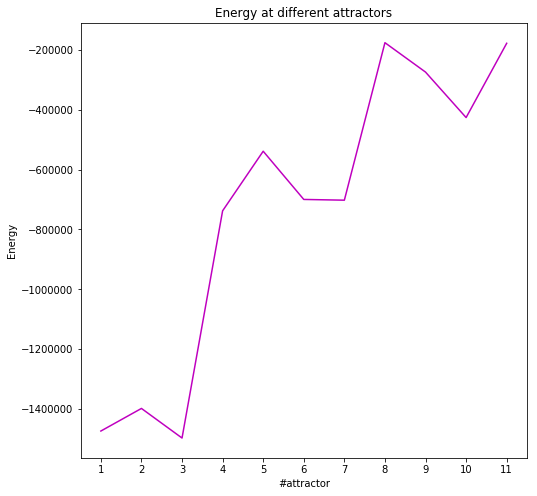

In [31]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
data = data.reshape(-1,1024)

#to start with learn the first three
train_X = data[0:3].copy()

W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)

epochs = 20
E_arr = []
for i in range(data.shape[0]):
    E = calculate_energy(data[i],W)
    E_arr.append(E)
    print("Energy for data ", i, "is equal to ", E)
    
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

ax1.plot(np.arange(len(E_arr)),E_arr,'m')
ax1.set_title('Energy at different attractors')
ax1.set_xlabel('#attractor')
ax1.set_ylabel('Energy')
ax1.set_xticks(np.arange(len(E_arr)))
ax1.set_xticklabels(np.arange(len(E_arr))+1)

plt.show()

# 3.3.3

In [32]:
def find_pattern_async_energy(x, W, epochs):
    arr = np.arange(10)
    energy_s = np.zeros(epochs)
    
    x_out = x.copy()
    for i in range(epochs):
        x_out = recall_async(x_out,W)
        E = calculate_energy(x_out,W)
        energy_s[i] = E
        print(E)
    return x_out, energy_s

-1413632.0
-1497344.0
-1497344.0
-1497344.0


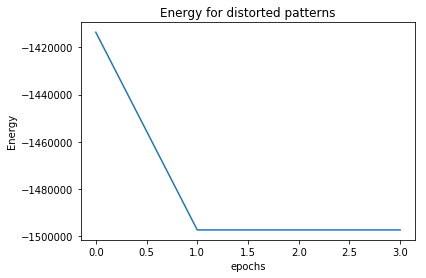

In [33]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
data = data.reshape(-1,1024)

#to start with learn the first three
train_X = data[0:3].copy()

W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)

epochs = 4
x, energy_s = find_pattern_async_energy(data[10],W,epochs)

plt.figure()
plt.plot(np.arange(epochs),energy_s)
plt.xlabel("epochs")
plt.ylabel("Energy")
plt.title('Energy for distorted patterns')
plt.show()

# 3.3.4

-1271.6334409255392
-1496.239977337873
-1562.2308234974832
-1639.4601436818482
-1600.6379582175443
-1616.849305735485
-1453.4993322296723
-1471.2584328650726
-1612.2276632969572
-1546.9624229042633
-1722.2098572039395
-1668.4442861095977
-1777.6338451386728
-1576.0388090836734
-1391.6051984922767
-1415.968821349772
-1627.1032832991593
-1518.634229186585
-1600.4530138324608
-1607.5175509286655


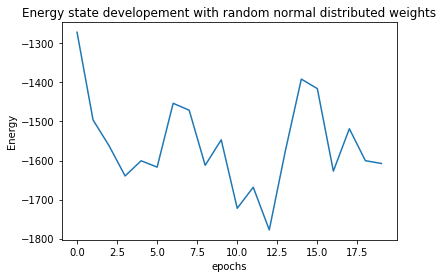

In [13]:
mu = 0
sigma = 0.1
W = np.random.normal(mu,sigma,(train_X.shape[1],train_X.shape[1]))

epochs = 20
x, energy_s = find_pattern_async_energy(data[10],W,epochs)

plt.figure()
plt.plot(np.arange(epochs),energy_s)
plt.xlabel("epochs")
plt.ylabel("Energy")
plt.title('Energy state developement with random normal distributed weights')
plt.show()

When weight init with random numbers the energy oscillates up and down without finding any attractors.

-2366.13197952444
-2755.7537194328715
-2923.379811636072
-3002.61122855542
-3046.533706561206
-3079.978266342626
-3105.7222889884233
-3133.632363153724
-3148.641362351535
-3155.971675226911
-3162.5875979234734
-3190.9712647323
-3211.1579398100375
-3227.009693000168
-3242.6272798123973
-3248.876823354669
-3250.3996927915746
-3257.156978844616
-3266.4419282841877
-3272.491244158774


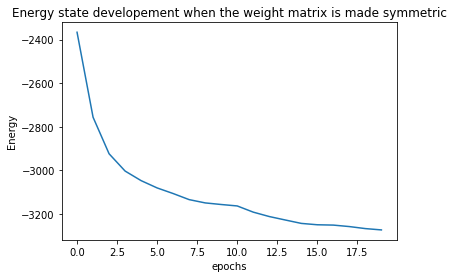

In [15]:
mu = 0
sigma = 0.1
W = np.random.normal(mu,sigma,(train_X.shape[1],train_X.shape[1]))
W =1/2*(W+W.T)

epochs = 20
x, energy_s = find_pattern_async_energy(data[10],W,epochs)

plt.figure()
plt.plot(np.arange(epochs),energy_s)
plt.title('Energy state developement when the weight matrix is made symmetric')
plt.xlabel("epochs")
plt.ylabel("Energy")
plt.show()

It finds an attractor. Because a symmetric weight matrix means that we have a fully connected network and thus the proof of convergence for the energy function is applicable. (s. 352 Rojas)